In [3]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
import itertools
tf.keras.preprocessing.image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [4]:
#train_gen = image_dataset_from_directory(directory="../input/new-plant-diseases-dataset/train",image_size=(256, 256))
#test_gen = image_dataset_from_directory(directory="../input/new-plant-diseases-dataset/valid",image_size=(256, 256))

train_gen = tf.keras.preprocessing.image_dataset_from_directory(directory="../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
                                         image_size=(256, 256))
test_gen = tf.keras.preprocessing.image_dataset_from_directory(directory="../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
                                        image_size=(256, 256))

rescale = Rescaling(scale=1.0/255)
train_gen = train_gen.map(lambda image,label:(rescale(image),label))
test_gen  = test_gen.map(lambda image,label:(rescale(image),label))

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [5]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1568,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(38,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                   

In [6]:
ep = 5
history = model.fit_generator(train_gen,
          validation_data=test_gen,
          epochs = ep)

Epoch 1/5
2197/2197 [==============================] - 198s 87ms/step - loss: 1.4371 - accuracy: 0.5834 - val_loss: 0.8062 - val_accuracy: 0.7573
Epoch 2/5
2197/2197 [==============================] - 175s 80ms/step - loss: 0.4417 - accuracy: 0.8620 - val_loss: 0.4855 - val_accuracy: 0.8469
Epoch 3/5
2197/2197 [==============================] - 176s 80ms/step - loss: 0.2808 - accuracy: 0.9144 - val_loss: 0.3358 - val_accuracy: 0.8938
Epoch 4/5
2197/2197 [==============================] - 176s 80ms/step - loss: 0.1900 - accuracy: 0.9394 - val_loss: 0.2953 - val_accuracy: 0.9042
Epoch 5/5
2197/2197 [==============================] - 176s 80ms/step - loss: 0.1394 - accuracy: 0.9573 - val_loss: 0.3255 - val_accuracy: 0.9052


In [7]:
model.save('en_iyi_.h5')

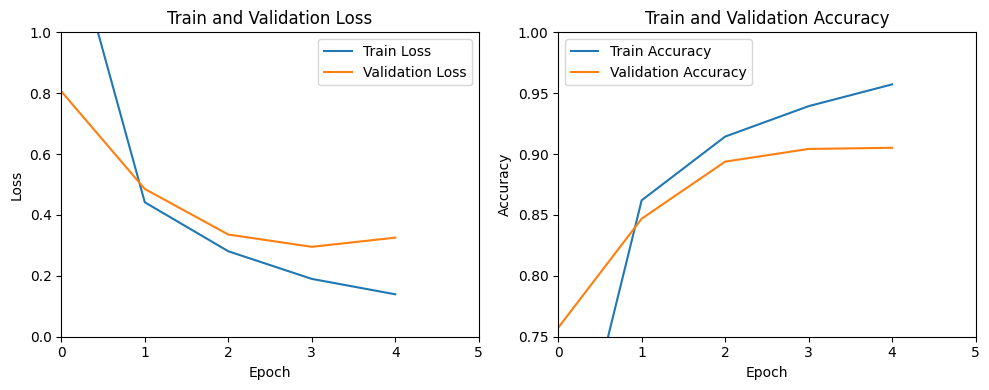

In [15]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 5)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 5)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [16]:
labels = []
predictions = []

for x,y in test_gen:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x),1).numpy())

1/1 [==============================] - 0s 132ms/step


In [17]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [18]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 95.73 %
Test Accuracy   : 90.51 %
Precision Score : 90.51 %
Recall Score    : 90.51 %


<Figure size 2000x500 with 0 Axes>

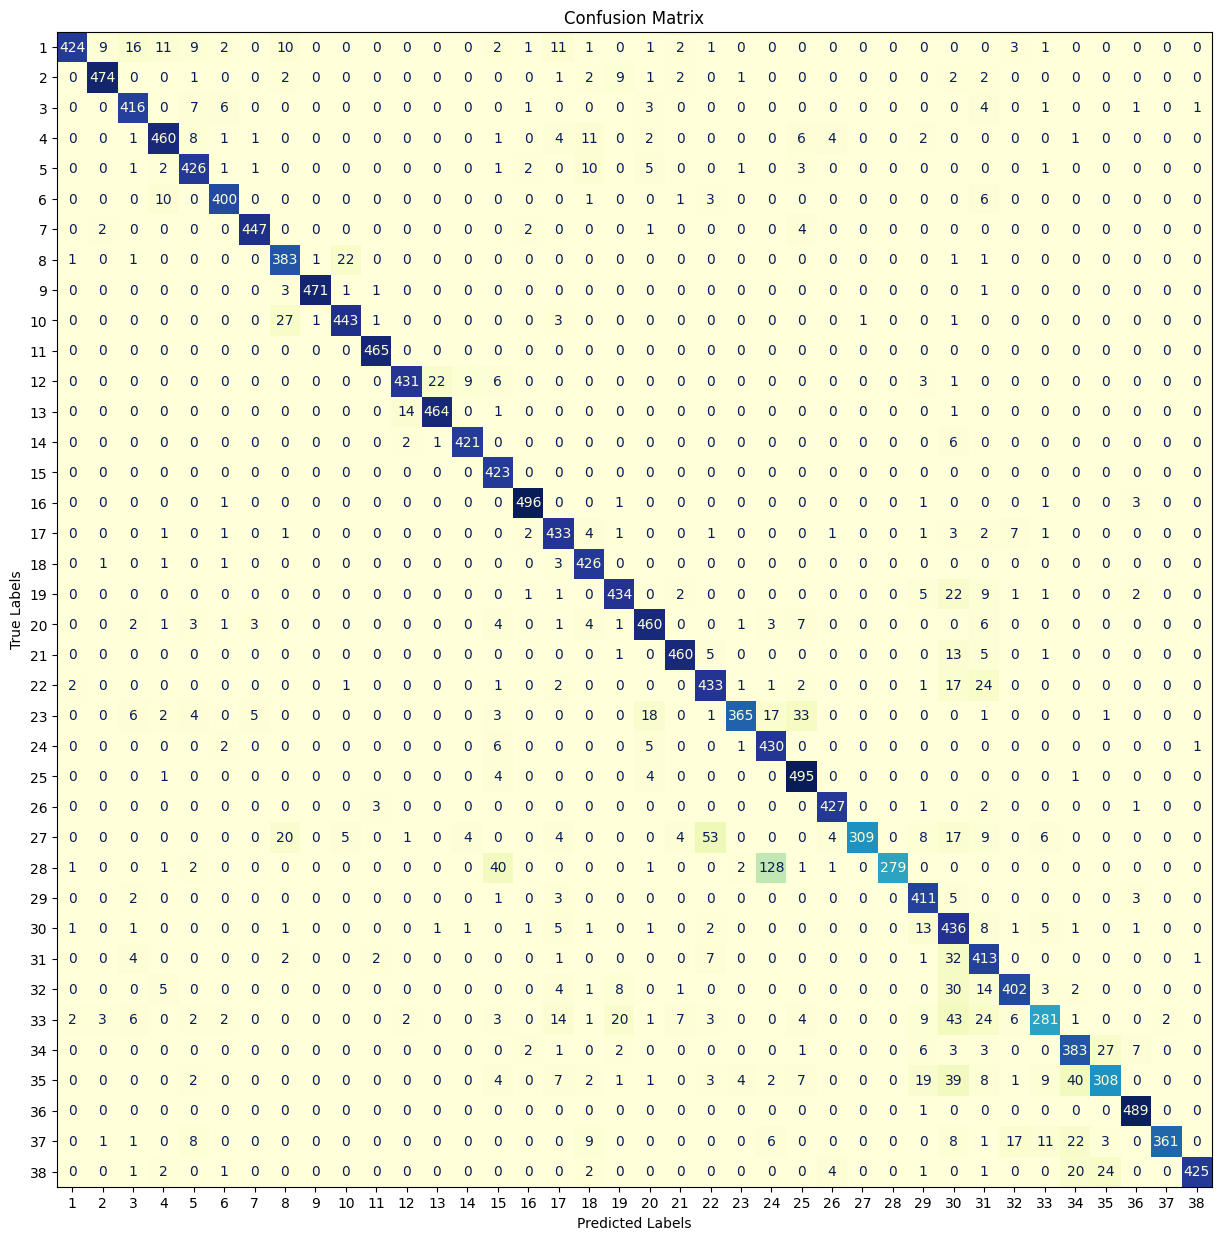

In [19]:
plt.figure(figsize= (20,5))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Test etmek istediğiniz resmin yolu
test_image_path = '../input/plantdisease/PlantVillage/Potato___Late_blight/00695906-210d-4a9d-822e-986a17384115___RS_LB 4026.JPG'

# Resmi modele uygun boyuta getirme ve normalizasyon işlemleri
img = image.load_img(test_image_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Eğitilmiş modelin yüklenmesi
model = tf.keras.models.load_model('../working/aaaaabcancer_model_460p_30epoch-0.987acc.h5')  # Eğitilmiş modelin dosya adını güncelleyin

# Modeli kullanarak resmi sınıflandırma
prediction = model.predict(img_array)
# En yüksek olasılığa sahip sınıfın endeksini bulma
predicted_class_index = np.argmax(prediction)

# Sınıf etiketlerini tanımlama
class_labels = ["Apple___Apple_scab", "Apple___Black_rot","Apple___Cedar_apple_rust", "Apple___healthy","Blueberry___healthy", "Cherry_(including_sour)___Powdery_mildew","Cherry_(including_sour)___healthy", "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot","Corn_(maize)___Common_rust_", "Corn_(maize)___Northern_Leaf_Blight","Corn_(maize)___healthy", "Grape___Black_rot","Grape___Esca_(Black_Measles)", "Grape___Leaf_blight_Isariopsis_Leaf_Spot","Grape___healthy", "Orange___Haunglongbing_Citrus_greening","Peach___Bacterial_spot", "Peach___healthy","Pepper,_bell___Bacterial_spot", "Pepper,_bell___healthy","Potato___Early_blight", "Potato___Late_blight","Potato___healthy", "Raspberry___healthy","Soybean___healthy", "Squash___Powdery_mildew","Strawberry___Leaf_scorch", "Strawberry___healthy","Tomato___Bacterial_spot", "Tomato___Early_blight","Tomato___Late_blight", "Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot", "Tomato___Spider_mites Two-spotted_spider_mite","Tomato___Target_Spot", "Tomato___Tomato_Yellow_Leaf_Curl_Virus","Tomato___Tomato_mosaic_virus", "Tomato___healthy"]  # Sınıf etiketlerini güncelleyin

# Tahmin edilen sınıf etiketini ekrana yazdırma
predicted_class_label = class_labels[predicted_class_index]
print(f"Resim {predicted_class_label} sınıfına aittir.")

1/1 [==============================] - 0s 370ms/step
Resim Tomato___Tomato_mosaic_virus sınıfına aittir.
